In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/PDS/diabetes.csv")



# **TASK A**

 Glucose Statistics
Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89
Population Max Glucose: 199


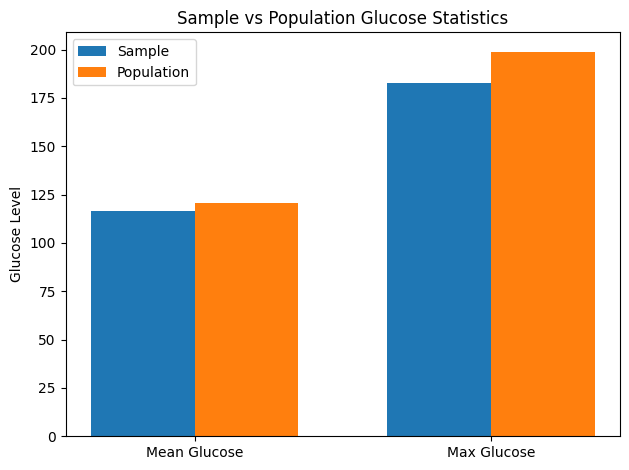

In [10]:
#setting random seed
np.random.seed(42)


# Taking a random sample of 25 observations from the population
sample = df.sample(n=25)

# Calculating  mean and max Glucose values in the sample and population
sample_mean_glucose = sample["Glucose"].mean()
sample_max_glucose = sample["Glucose"].max()
population_mean_glucose = df["Glucose"].mean()
population_max_glucose = df["Glucose"].max()

# Printing results
print(" Glucose Statistics")
print(f"Sample Mean Glucose: {sample_mean_glucose:.2f}")
print(f"Sample Max Glucose: {sample_max_glucose}")
print(f"Population Mean Glucose: {population_mean_glucose:.2f}")
print(f"Population Max Glucose: {population_max_glucose}")

# Bar chart comparing sample and population glucose stats
labels = ["Mean Glucose", "Max Glucose"]
sample_vals = [sample_mean_glucose, sample_max_glucose]
population_vals = [population_mean_glucose, population_max_glucose]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, sample_vals, width, label="Sample")
ax.bar(x + width/2, population_vals, width, label="Population")
ax.set_ylabel("Glucose Level")
ax.set_title("Sample vs Population Glucose Statistics")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# **TASK B**


 98th Percentile of BMI
Sample 98th Percentile of BMI: 40.25
Population 98th Percentile of BMI: 47.53


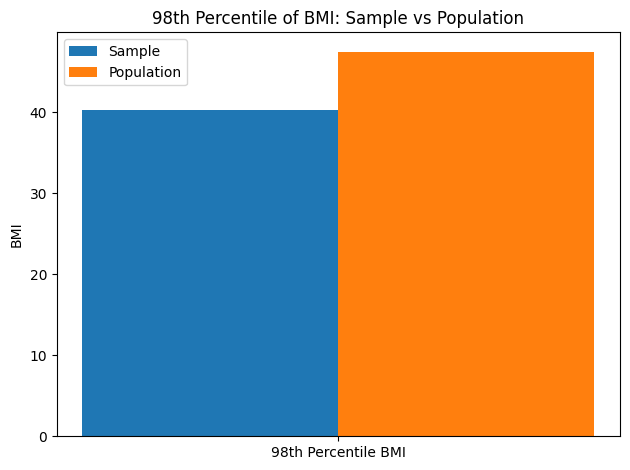

In [11]:
# Calculating 98th percentile of BMI in the sample and population
sample_bmi_98 = np.percentile(sample["BMI"], 98)
population_bmi_98 = np.percentile(df["BMI"], 98)

# Print results
print("\n 98th Percentile of BMI")
print(f"Sample 98th Percentile of BMI: {sample_bmi_98:.2f}")
print(f"Population 98th Percentile of BMI: {population_bmi_98:.2f}")

# Bar chart comparing 98th percentile of BMI
labels = ["98th Percentile BMI"]
sample_vals = [sample_bmi_98]
population_vals = [population_bmi_98]

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x - width/2, sample_vals, width, label="Sample")
ax.bar(x + width/2, population_vals, width, label="Population")
ax.set_ylabel("BMI")
ax.set_title("98th Percentile of BMI: Sample vs Population")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

# **TASK C**


 Bootstrap BloodPressure Statistics
Bootstrap Mean BloodPressure: 69.18
Bootstrap Std BloodPressure: 19.08
Bootstrap 98th Percentile BloodPressure: 97.92
Population Mean BloodPressure: 69.11
Population Std BloodPressure: 19.36
Population 98th Percentile BloodPressure: 99.32


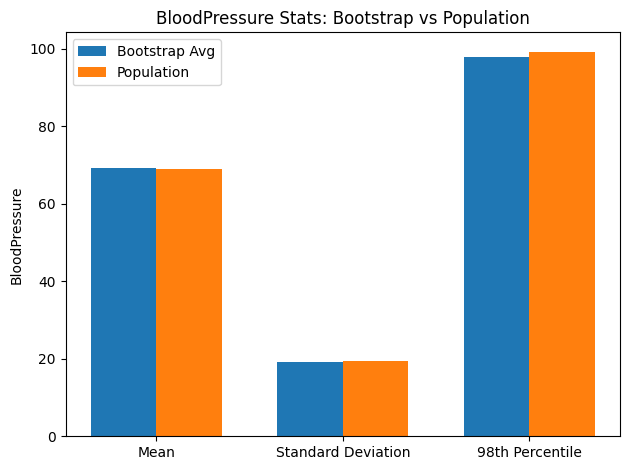

In [12]:
# Generating 500 bootstrap samples (n=150) for BloodPressure
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = df["BloodPressure"].sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())
    bootstrap_stds.append(bootstrap_sample.std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample, 98))

# Computing averages of bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_percentile = np.mean(bootstrap_percentiles)

# Get population statistics for comparison
population_mean = df["BloodPressure"].mean()
population_std = df["BloodPressure"].std()
population_percentile = np.percentile(df["BloodPressure"], 98)

# Printing results
print("\n Bootstrap BloodPressure Statistics")
print(f"Bootstrap Mean BloodPressure: {avg_bootstrap_mean:.2f}")
print(f"Bootstrap Std BloodPressure: {avg_bootstrap_std:.2f}")
print(f"Bootstrap 98th Percentile BloodPressure: {avg_bootstrap_percentile:.2f}")
print(f"Population Mean BloodPressure: {population_mean:.2f}")
print(f"Population Std BloodPressure: {population_std:.2f}")
print(f"Population 98th Percentile BloodPressure: {population_percentile:.2f}")

# Bar chart comparing bootstrap vs population stats
labels = ["Mean", "Standard Deviation", "98th Percentile"]
bootstrap_stats = [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_percentile]
population_stats = [population_mean, population_std, population_percentile]

x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x - width/2, bootstrap_stats, width, label="Bootstrap Avg")
ax.bar(x + width/2, population_stats, width, label="Population")
ax.set_ylabel("BloodPressure")
ax.set_title("BloodPressure Stats: Bootstrap vs Population")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()